In [1092]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [1093]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [1094]:
df.drop(columns="Unnamed: 0", inplace=True)

In [1095]:
df_subset = df.sample(n=7, replace= False, random_state=2)
x_sub = df_subset.TV.values
y_sub = df_subset.sales.values
idx = np.argsort(x_sub)
x_sub = x_sub[idx]
y_sub = y_sub[idx]

In [1096]:
# Understanding the argsort function
print(df_subset.TV.values)
print(idx)
print(x_sub)

[175.7  70.6  56.2 232.1 166.8 193.2  66.1]
[2 6 1 4 0 5 3]
[ 56.2  66.1  70.6 166.8 175.7 193.2 232.1]


In [1097]:
def find_nearest(array, value):
    idx = pd.Series(np.abs(array - value)).idxmin()
    return idx, array[idx]

def find_nearest_n(array, value, n=1):
    ab = np.abs(array - value)
    idx =  np.argsort(ab)
    return idx[:n] #list(zip(idx[:n], array[idx][:n]))

In [1098]:
# Testing the functions
# find_nearest(x_sub,65)
find_nearest_n(x_sub,200,4)

array([5, 4, 6, 3], dtype=int64)

In [1099]:
x = np.linspace(np.min(x_sub), np.max(x_sub))
y = np.zeros((len(x)))
y2 = np.zeros((len(x)))

In [1100]:
for i, xi in enumerate(x):
    y[i] = y_sub[find_nearest(x_sub,xi)[0]]
y

array([ 8.7,  8.7,  8.6,  8.6, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5,
       10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 19.6, 19.6, 19.6, 19.6,
       19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6,
       14.1, 14.1, 14.1, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2, 15.2,
       13.4, 13.4, 13.4, 13.4, 13.4, 13.4])

In [1101]:
n=2
for i, xi in enumerate(x):
    y2[i] = y_sub[find_nearest_n(x_sub,xi,n)].mean()
y2

array([ 8.65,  8.65,  8.65,  9.55,  9.55,  9.55,  9.55,  9.55,  9.55,
        9.55,  9.55,  9.55,  9.55,  9.55,  9.55,  9.55,  9.55, 15.05,
       15.05, 16.85, 16.85, 16.85, 16.85, 16.85, 16.85, 16.85, 16.85,
       16.85, 16.85, 16.85, 16.85, 16.85, 16.85, 16.85, 16.85, 14.65,
       14.65, 14.65, 14.65, 14.65, 14.65, 14.65, 14.3 , 14.3 , 14.3 ,
       14.3 , 14.3 , 14.3 , 14.3 , 14.3 ])

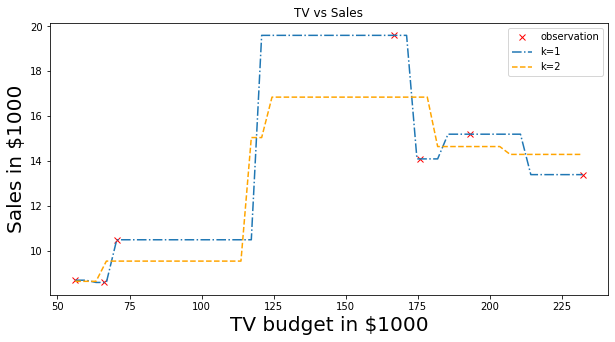

In [1102]:
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(x_sub,y_sub,'rx',label='observation')
ax.plot(x,y,'-.',label='k=1')
ax.plot(x,y2,'--', color='orange',label=f'k={n}')

# Set the title and axis labels
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000',fontsize = 20)
plt.ylabel('Sales in $1000',fontsize = 20)
plt.legend()
plt.show()

In [1112]:
X = df[['TV']]
y = df.sales.values

In [1113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6, random_state=66)

C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\aduno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


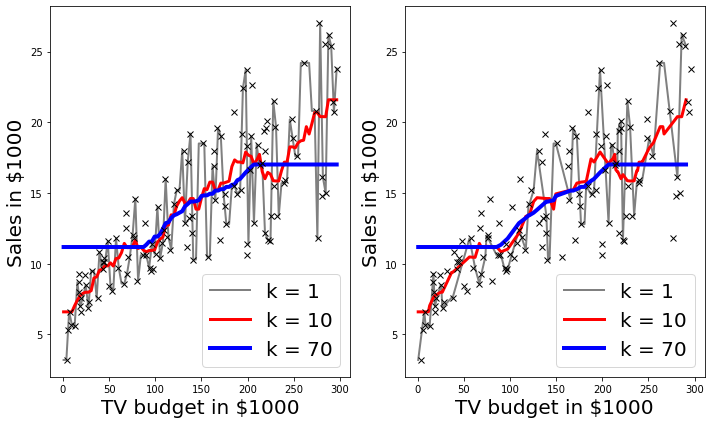

In [1126]:
k_min = 1
k_max = 70
k_list = np.linspace(k_min, k_max,70,dtype=int)

fig, ax = plt.subplots(1,2,figsize=(10,6))
j=0
for k_value in k_list:
    knr = KNeighborsRegressor(n_neighbors=k_value)
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)

    colors = ['grey', 'r', 'b']
    if k_value in [1,10,70]:
        xval = np.linspace(X.min(),X.max(),100)
        ypreds = knr.predict(xval)
        ax[0].plot(xval, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2, color = colors[j])
        idx = np.argsort(X_test['TV'].values)
        X_testi = X_test.TV.values[idx]
        y_predi = y_pred[idx]
        ax[1].plot(X_testi, y_predi,'-',label = f'k = {int(k_value)}',linewidth=j+2, color = colors[j])
        j += 1

ax[0].legend(loc='lower right',fontsize=20)
ax[0].plot(X_train, y_train,'x',label='train',color='k')
ax[0].set_xlabel('TV budget in $1000',fontsize=20)
ax[0].set_ylabel('Sales in $1000',fontsize=20)
ax[1].legend(loc='lower right',fontsize=20)
ax[1].plot(X_train, y_train,'x',label='train',color='k')
ax[1].set_xlabel('TV budget in $1000',fontsize=20)
ax[1].set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

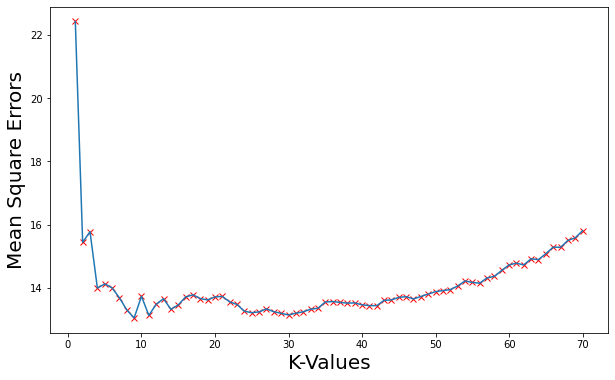

Best K-value: 9


In [ ]:

mse_list = []
for k_value in k_list:
    knr = KNeighborsRegressor(n_neighbors=int(k_value))
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(k_list, mse_list,'rx', k_list, mse_list)
plt.xlabel('K-Values',fontsize = 20)
plt.ylabel('Mean Square Errors',fontsize = 20)
plt.show()

idx = pd.Series(mse_list).idxmin()
k_minmse_value = k_list[idx]
print(f"Best K-value: {k_minmse_value}")


In [ ]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=int(k_minmse_value))
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)

# Print the R2 score of the model
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")

The R2 score for your model is 0.5492457002030715
